In [1]:
import pandas as pd

# مقدار حد آستانه را وارد کنید یا اصلاح کنید

In [2]:
threshold=0.99

In [3]:
df=pd.read_excel('data_u6.xlsx')
df.head()

obj  class        f1        f2         f3          f5         f6  \
0    1      1  0.778021  0.370202  40.129490  105.621967  75.000000   
1    2      1  0.821474  0.245085  22.974936   92.439169  72.090221   
2    3      1  0.223832  0.178680  24.034978   71.400280  42.296572   
3    4      1  0.825111  0.059789   7.531322   64.761099  55.362442   
4    5      1  0.311822  0.134679  13.241971   50.447993   8.246211   

           f7          f8           f9  ...        f2541     f2545     f2546  \
0  119.854078  120.623381  3406.541667  ...  2709.139464  0.000382  7.584146   
1   73.348483   99.206855  2486.166667  ...  1797.152900  0.000725  7.572633   
2   78.447435   94.323910  1298.166667  ...   824.070347  0.001518  7.419445   
3    6.082763   90.255194    70.250000  ...    45.985507  0.015250  5.756863   
4   17.464249   87.960218   479.125000  ...   388.739696  0.002676  7.166653   

      f2549     f2550         f2551       f2553  f2555  f2556  f2557  
0  0.021298  0.002399  294890.01230   44.432247     36    1.0    3.0  
1  0.014414  0.003574  196790.75310   47.867235     28    1.0    5.0  
2  0.012748  0.007548   93491.09881   58.766584     27    1.0    6.0  
3  0.015342  0.030374   28001.93655  106.215785     29    0.0    3.0  
4  0.010228  0.011863  165579.87010  116.725737     31    1.0    3.0  

[5 rows x 1336 columns]

In [4]:
import pandas as pd

# Load your DataFrame
# df = pd.read_csv("your_data.csv")

#correlation_matrix = df.corr(method='spearman')
correlation_matrix = df.corr(method='pearson')

correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= 1:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
print("Highly Correlated Pairs:")
for pair in correlated_pairs:
    print(pair)
    print(pair[0],' = ',round(df[list(pair)[0]][0]/df[list(pair)[1]][0],2),' X ',pair[1])
    print(df[list(pair)].head())
    print('***************')
print(len(correlated_pairs),' correlated_pairs exist')

Highly Correlated Pairs:
0  correlated_pairs exist


In [5]:
def read_excel_to_dict(file_path):
    data = pd.read_excel(file_path)  # Assuming the first column is the index
    data_dict = data.iloc[0].to_dict()
    return data_dict

file_path = "not_sort2.xlsx"  # Replace with the actual file path
data_dict = read_excel_to_dict(file_path)

def find_max_corr_column(candidates, abs_correlations_dict):
    max_corr = -np.inf
    max_corr_column = None
    for col in candidates:
        if abs_correlations_dict[col] > max_corr:
            max_corr = abs_correlations_dict[col]
            max_corr_column = col
    return max_corr_column,max_corr
def calculate_column_abs_correlations(df, target_column):
    correlations = {}

    for column in df.columns:
        if column != target_column:
            correlation = abs(df[column].corr(df[target_column]))  # Calculate absolute correlation
            correlations[column] = correlation

    return correlations

# Assuming your target column name is 'class'
abs_correlations_dict = calculate_column_abs_correlations(df, 'class')

In [6]:
import pandas as pd
import numpy as np

def print_correlation_with_class(p_values_dict, data_frame,Method):
    # Convert the dictionary to a list of tuples for easier sorting
    p_value_items = list(p_values_dict.items())

    # Sort the list of tuples based on p-values
    sorted_p_values = sorted(p_value_items, key=lambda x: x[1])

    # Initialize a dictionary to store columns with equal p-values
    equal_p_value_columns = {}

    # Group columns with equal p-values
    for i in range(len(sorted_p_values) - 1):
        if np.isclose(sorted_p_values[i][1], sorted_p_values[i + 1][1], rtol=1e-6):
            col1 = sorted_p_values[i][0]
            col2 = sorted_p_values[i + 1][0]

            if col1 not in equal_p_value_columns:
                equal_p_value_columns[col1] = [col1, col2]
            else:
                equal_p_value_columns[col1].append(col2)

    # Calculate correlation with 'class' for columns with equal p-values
    for columns in equal_p_value_columns.values():
        print("Columns with equal p-values:", columns)
        for col in columns:
            correlation = data_frame[col].corr(data_frame['class'],method=Method)
            print(f"{col} correlation with 'class': {correlation}")

# Example usage:.corr(method='spearman')
# Assuming you have a DataFrame called 'df' with columns and 'class' column
# and a dictionary 'p_values' with column names as keys and p-values as values
# print_correlation_with_class(p_values, df)


In [7]:
Df=pd.read_excel('data_u6.xlsx')

print_correlation_with_class(data_dict, Df,'spearman')

Columns with equal p-values: ['f2556', 'f2557']
f2556 correlation with 'class': 0.8013611801611887
f2557 correlation with 'class': 0.7476545659905564
Columns with equal p-values: ['f2225', 'f2347']
f2225 correlation with 'class': 0.4536337348230662
f2347 correlation with 'class': 0.4536337348230662
Columns with equal p-values: ['f2347', 'f2448']
f2347 correlation with 'class': 0.4536337348230662
f2448 correlation with 'class': 0.4536337348230662
Columns with equal p-values: ['f1323', 'f2039']
f1323 correlation with 'class': 0.44805055039447456
f2039 correlation with 'class': 0.44805055039447456
Columns with equal p-values: ['f2039', 'f2075']
f2039 correlation with 'class': 0.44805055039447456
f2075 correlation with 'class': -0.44805055039447456
Columns with equal p-values: ['f2075', 'f2411']
f2075 correlation with 'class': -0.44805055039447456
f2411 correlation with 'class': 0.44805055039447456
Columns with equal p-values: ['f12', 'f1508']
f12 correlation with 'class': 0.44595685623375

In [8]:
print_correlation_with_class(data_dict, Df,'pearson')

Columns with equal p-values: ['f2556', 'f2557']
f2556 correlation with 'class': 0.7929466049192202
f2557 correlation with 'class': 0.6727745181397518
Columns with equal p-values: ['f2225', 'f2347']
f2225 correlation with 'class': 0.43820704185264375
f2347 correlation with 'class': 0.43466529021471934
Columns with equal p-values: ['f2347', 'f2448']
f2347 correlation with 'class': 0.43466529021471934
f2448 correlation with 'class': 0.4228637516836035
Columns with equal p-values: ['f1323', 'f2039']
f1323 correlation with 'class': 0.2473363667270138
f2039 correlation with 'class': 0.44116614028226964
Columns with equal p-values: ['f2039', 'f2075']
f2039 correlation with 'class': 0.44116614028226964
f2075 correlation with 'class': -0.1225673374349017
Columns with equal p-values: ['f2075', 'f2411']
f2075 correlation with 'class': -0.1225673374349017
f2411 correlation with 'class': 0.4309585853120277
Columns with equal p-values: ['f12', 'f1508']
f12 correlation with 'class': 0.426271027027804

In [9]:
#import random
def reduce_correlated_columns(df, correlated_groups, p_values, class_abs_correlation):
    reduced_columns = []
    selected_columns=[]
    p_val_columns=[]
    corr_columns=[]
    dff=df
    old_fcandidates=[]
    old_candidates=[]
    for group in correlated_groups:
        candidates=[]
        fcandidates=[]
        min_pvalue_column,min_p_value = find_min_pvalue_column(group, p_values)

        for col in group:
          if p_values[col]==min_p_value:
            candidates.append(col)
        if len(candidates)==1:
          selected_columns.append(candidates[0])
          p_val_columns.append(candidates[0])

        if len(candidates)>1:
            if old_candidates!=candidates and len(candidates)!=1 :
              print(candidates)
              print(df[candidates])
              print('***')
            old_candidates=candidates
            max_cor_column,max_cor = find_max_corr_column(candidates, abs_correlations_dict)

            for cl in candidates:

              if abs_correlations_dict[cl]==max_cor:
                fcandidates.append(cl)
            if fcandidates!=[] and old_fcandidates!=fcandidates and len(fcandidates)!=1 :
              print(fcandidates)
              print(df[fcandidates])
              print('***')


            old_fcandidates=fcandidates
            if len(fcandidates)==1:
              selected_columns.append(fcandidates[0])
              corr_columns.append(fcandidates[0])
            if len(fcandidates)>1:
              for i in fcandidates:

                selected_columns.append(i)
                corr_columns.append(i)


                #print(i)

    print(len(set(selected_columns)), ' columns have been selected')
    return set(selected_columns) , set(corr_columns),set(p_val_columns),

def detect_correlation_groups(df, threshold):
    corr_matrix = df.corr(method='spearman').abs()
    column_correlation_groups = {}  # To store the correlated groups for each column

    for column in corr_matrix.columns:
        correlated_group = set()

        if column not in column_correlation_groups:
            correlated_group.add(column)

            for other_column in corr_matrix.columns:
                if other_column != column:
                    if other_column in column_correlation_groups and column in column_correlation_groups[other_column]:
                        correlated_group.update(column_correlation_groups[other_column])

                    elif corr_matrix.loc[column, other_column] > threshold:
                        correlated_group.add(other_column)

            if len(correlated_group) > 1:
                #print(correlated_group)
                for col in correlated_group:
                    column_correlation_groups[col] = correlated_group

    return list(column_correlation_groups.values())
def find_min_pvalue_column(correlation_group, p_values):
    min_pvalue = np.inf
    min_pvalue_column = None
    for col in correlation_group:
        if p_values[col] < min_pvalue:
            min_pvalue = p_values[col]
            min_pvalue_column = col
    return min_pvalue_column,min_pvalue

In [10]:
from natsort import natsorted
import numpy as np
import pandas as pd

m='spearman' #'spearman' or 'pearson'
final_df=df
i=0
p_values_dict=data_dict
final_df_without_first_and_second_column=final_df.drop(columns=['class','obj'])
correlation_matrix = final_df_without_first_and_second_column.corr(method='spearman')
correlation_array = correlation_matrix.to_numpy()
upper_triangular_matrix = np.triu(correlation_array, k=1)
upper_triangular_df = pd.DataFrame(upper_triangular_matrix, columns=correlation_matrix.columns, index=correlation_matrix.index)
absolute_upper_triangular_df = np.abs(upper_triangular_df)
absolute_upper_triangular_df = absolute_upper_triangular_df.applymap(lambda x: float(x))
absolute_upper_triangular_df = absolute_upper_triangular_df.applymap(lambda x: np.nan if x < threshold else 1)
N=absolute_upper_triangular_df.count().sum()
while N!=0:
  print('-------------------------------------------------')

  print(N,' correlated feature exist')

  correlated_groups = detect_correlation_groups(final_df_without_first_and_second_column, threshold)
  columns,corr_columns,p_val_columns=reduce_correlated_columns(final_df.copy(), correlated_groups, p_values_dict,abs_correlations_dict)
  column2remove=[]
  for group in correlated_groups:
    for col in group:
      column2remove.append(col)
  keptcolumns=[]
  for col in final_df.columns:
    if col not in set(column2remove):
      keptcolumns.append(col)
  removed_columns=[]
  for col in set(column2remove):
    if col not in columns:
      removed_columns.append(col)
  final_columns=list(keptcolumns)+list(columns)
  sorted_list = sorted(final_columns)
  sorted_list = natsorted(sorted_list)
  item_to_move = 'obj'
  index_to_move = sorted_list.index(item_to_move)
  sorted_list.pop(index_to_move)
  sorted_list.insert(0, item_to_move)
  final_df = final_df[sorted_list]
  final_df_without_first_and_second_column=final_df.drop(columns=['class','obj'])
  correlation_matrix = final_df_without_first_and_second_column.corr(method=m)
  correlation_array = correlation_matrix.to_numpy()
  upper_triangular_matrix = np.triu(correlation_array, k=1)
  upper_triangular_df = pd.DataFrame(upper_triangular_matrix, columns=correlation_matrix.columns, index=correlation_matrix.index)
  absolute_upper_triangular_df = np.abs(upper_triangular_df)
  absolute_upper_triangular_df = absolute_upper_triangular_df.applymap(lambda x: float(x))
  absolute_upper_triangular_df = absolute_upper_triangular_df.applymap(lambda x: np.nan if x < threshold else 1)
  old_N=N
  N=absolute_upper_triangular_df.count().sum()
  print('itteration number ',i)
  print('Number of correlated features reduced from ',old_N, ' to ',N)
  i=i+1
  if N==old_N:
    print('number of correlated features can not reduce more, ')
    print('due to the existing of features with same p-value and same correllation with each other')

    break
  #p_values_dict=
print('********************************')
print('total itterations: ',i)
print(N,' correlated feature exist')
kept_df=final_df[list(keptcolumns)]
corr_df=final_df[list(columns)]
final_df.head()

-------------------------------------------------
7085  correlated feature exist
['f99', 'f94']
         f99       f94
0   0.001106  0.001260
1   0.001944  0.002305
2   0.003827  0.004537
3   0.022106  0.023028
4   0.014139  0.015685
..       ...       ...
95  0.005061  0.006750
96  0.006802  0.007677
97  0.000876  0.001138
98  0.004719  0.005171
99  0.003616  0.004803

[100 rows x 2 columns]
***
['f91', 'f102']
          f91       f102
0    6.535697   3.568834
1   30.483258  24.861424
2   13.898089   9.290641
3    2.301587   0.481230
4   11.560166   7.151909
..        ...        ...
95  64.664580  56.714506
96   4.436997   1.718477
97  11.423353   7.631084
98   4.909836   2.213421
99  74.567993  66.360671

[100 rows x 2 columns]
***
['f99', 'f94']
         f99       f94
0   0.001106  0.001260
1   0.001944  0.002305
2   0.003827  0.004537
3   0.022106  0.023028
4   0.014139  0.015685
..       ...       ...
95  0.005061  0.006750
96  0.006802  0.007677
97  0.000876  0.001138
98  0.00471

obj  class        f1        f2         f3          f5         f6  \
0    1      1  0.778021  0.370202  40.129490  105.621967  75.000000   
1    2      1  0.821474  0.245085  22.974936   92.439169  72.090221   
2    3      1  0.223832  0.178680  24.034978   71.400280  42.296572   
3    4      1  0.825111  0.059789   7.531322   64.761099  55.362442   
4    5      1  0.311822  0.134679  13.241971   50.447993   8.246211   

           f7          f8         f15  ...      f2533     f2539     f2545  \
0  119.854078  120.623381  181.980039  ...  27.659562  0.001638  0.000382   
1   73.348483   99.206855  170.479532  ...  19.910369  0.000945  0.000725   
2   78.447435   94.323910  162.379030  ...  10.805877  0.001936  0.001518   
3    6.082763   90.255194  188.893924  ...   1.695652  0.015579  0.015250   
4   17.464249   87.960218  194.212082  ...   4.418655  0.002749  0.002676   

      f2546     f2549         f2551       f2553  f2555  f2556  f2557  
0  7.584146  0.021298  294890.01230   44.432247     36    1.0    3.0  
1  7.572633  0.014414  196790.75310   47.867235     28    1.0    5.0  
2  7.419445  0.012748   93491.09881   58.766584     27    1.0    6.0  
3  5.756863  0.015342   28001.93655  106.215785     29    0.0    3.0  
4  7.166653  0.010228  165579.87010  116.725737     31    1.0    3.0  

[5 rows x 744 columns]

# correlated features below:

In [11]:
pd.set_option('display.max_columns', None)
df[list(corr_columns)]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

[100 rows x 0 columns]

#  ذخیره و نمایش و............

In [12]:
final_df.head()

obj  class        f1        f2         f3          f5         f6  \
0    1      1  0.778021  0.370202  40.129490  105.621967  75.000000   
1    2      1  0.821474  0.245085  22.974936   92.439169  72.090221   
2    3      1  0.223832  0.178680  24.034978   71.400280  42.296572   
3    4      1  0.825111  0.059789   7.531322   64.761099  55.362442   
4    5      1  0.311822  0.134679  13.241971   50.447993   8.246211   

           f7          f8         f15         f16           f17        f19  \
0  119.854078  120.623381  181.980039  257.927747  1.875973e+08  35.648216   
1   73.348483   99.206855  170.479532  223.733829  1.058142e+08  27.948437   
2   78.447435   94.323910  162.379030  253.290927  6.468318e+07  44.845051   
3    6.082763   90.255194  188.893924  255.076785  4.370367e+06  35.969604   
4   17.464249   87.960218  194.212082  250.423653  2.517453e+07  28.125809   

          f21        f22         f24         f25        f27         f28  \
0  294.546234  23.579771  230.415985   22.940676  15.338101  226.925723   
1  264.952240  18.060674  204.647751   43.036640  11.611892  200.965462   
2  291.582703  27.691972  224.670036   92.175262  19.310938  219.053776   
3  270.753693  21.001836  229.639481  154.326981  14.920932  226.751142   
4  288.693268  17.060845  222.362572  152.028259  11.672649  223.051654   

        f39       f40        f41       f43       f44       f47       f48  \
0  4.481604  3.643964  16.006034  0.212927  0.988716  0.719394  0.220146   
1  3.299699  3.246846   9.273114  0.279620  0.990498  0.708760  0.287028   
2  4.275198  3.572052  13.011379  0.221587  0.982420  0.862866  0.225237   
3  5.513725  3.352830  18.266011  0.174537  0.934782  0.995874  0.182654   
4  4.051359  3.456806  11.370417  0.221766  0.968507  0.821638  0.219618   

        f52        f56       f60        f62       f68       f70       f83  \
0  0.659477  31.646118  1.653756  39.001086  0.504995  0.000684  0.048687   
1  0.664317  19.843713  3.771528  23.770394  0.364239  0.000899  0.091764   
2  0.669384  42.677754  2.432286  47.763512  0.398815  0.001937  0.070594   
3  0.930027  26.315243  0.613979  26.716401  0.637072  0.016616  0.023492   
4  0.506384  17.526453  2.030168  19.155295  0.417596  0.007129  0.063986   

        f86        f89        f91           f92       f97      f100      f103  \
0  0.000972  47.062500   6.535697  12485.769270  0.748793  6.099861  0.208418   
1  0.001528  32.078726  30.483258  36807.942990  0.684219  6.117552  0.186187   
2  0.003075  55.328218  13.898089  11668.331210  0.691196  6.352797  0.144901   
3  0.018511  31.111111   2.301587    603.285714  0.789877  4.909277  0.056375   
4  0.010105  27.038446  11.560166   2862.601660  0.712174  5.697579  0.173987   

       f106       f108          f110       f116       f117      f131  \
0  0.130026 -52.035064  4.781097e+06 -12.935353 -11.163923  0.206524   
1  0.072411 -38.378041  1.887727e+06 -10.285282  -8.294217  0.324859   
2  0.211250 -38.115952  1.070813e+06  -8.392629  -6.119442  0.285934   
3  0.451326 -52.328724  9.404511e+04  -7.105880  -0.210757 -0.051216   
4  0.162417 -44.477188  4.232849e+05 -11.522002 -11.732962  0.118117   

       f136      f137      f139      f140      f145      f150      f153  \
0  0.194314  0.985589 -0.107576  0.778525  0.597291  6.584814  1.566629   
1  0.246896  0.985445 -0.099242  0.720489  0.582532  6.496913  2.969964   
2  0.224087  0.980819 -0.125582  0.786420  0.633064  6.485637  2.275982   
3  0.110352  0.916214 -0.652668  0.997449  0.974662  5.100469  0.458962   
4  0.178643  0.968366 -0.180989  0.887603  0.489198  6.111723  1.305145   

       f163      f168      f179          f185      f187      f190      f192  \
0  0.000895  1.131478  0.001277   7174.304878  0.001585  0.754180  0.001381   
1  0.002274  1.219091  0.003563  10254.211920  0.005317  0.679087  0.004564   
2  0.002865  1.211439  0.004469  11142.390650  0.007078  0.637861  0.005933   
3  0.020686  1.056463  0.022124    589.426471  0.

In [13]:
final_df.to_csv(f'final_data_{int(threshold*100)}.csv')

In [14]:
kept_df.to_csv(f'no_corr_columns_{int(threshold*100)}.csv')

In [15]:
corr_df.to_csv(f'selected_columns_{int(threshold*100)}.csv')

In [16]:
import pandas as pd
df_without_first_and_second_column=df.drop(columns=['class','obj'])
# Assuming correlation_matrix is your calculated correlation matrix
correlation_matrix = df_without_first_and_second_column.corr(method='spearman')

# Get the names of the features
feature_names = correlation_matrix.columns.tolist()

# Reshape the correlation matrix into a vector
correlation_vector = correlation_matrix.values.flatten()

# Create a DataFrame with feature names and correlation values
correlation_df = pd.DataFrame({
    'Feature 1': [feature_names[i] for i in range(len(feature_names)) for _ in range(len(feature_names))],
    'Feature 2': feature_names * len(feature_names),
    'Correlation': correlation_vector
})
correlation_df = correlation_df[correlation_df['Feature 1'] < correlation_df['Feature 2']]
correlation_df

Feature 1 Feature 2  Correlation
1              f1        f2     0.680684
2              f1        f3     0.493837
3              f1        f5     0.403387
4              f1        f6     0.666085
5              f1        f7     0.467972
...           ...       ...          ...
1778799     f2557      f994    -0.293577
1778800     f2557      f995     0.360733
1778801     f2557      f996    -0.382315
1778802     f2557      f997    -0.300684
1778803     f2557      f999     0.216491

[889111 rows x 3 columns]

In [17]:
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
correlation_df

Feature 1 Feature 2  Correlation
12515         f11      f862     0.999988
11180         f10      f861     0.999988
1399087     f2044     f2055     0.999976
958537      f1286     f1297     0.999976
1177484     f1627     f1657     0.999976
...           ...       ...          ...
928475      f1234       f14    -0.999520
15896         f14     f2364    -0.999532
14900         f14      f383    -0.999556
15054         f14      f662    -0.999568
15459         f14     f1420    -0.999568

[889111 rows x 3 columns]

In [18]:
correlation_df.to_csv('correlation_df_vec.csv')

In [19]:
abs_correlation_df = correlation_df.sort_values(by='Correlation', key=abs, ascending=False)
abs_correlation_df

Feature 1 Feature 2  Correlation
12515         f11      f862     0.999988
11180         f10      f861     0.999988
1399087     f2044     f2055     0.999976
958537      f1286     f1297     0.999976
1177484     f1627     f1657     0.999976
...           ...       ...          ...
101138       f116     f2124     0.000012
843277      f1100      f318     0.000012
1077884     f1479       f15     0.000012
1355149     f1966     f2209     0.000000
1103085     f1511     f2326     0.000000

[889111 rows x 3 columns]

In [20]:
abs_correlation_df.to_csv('abs_correlation_df_vec.csv')

In [21]:
correlation_matrix_final_df = final_df.corr(method='spearman')
correlation_matrix_final_df.head()

obj     class        f1        f2        f3        f5        f6  \
obj    1.000000  0.859810  0.203324  0.396136  0.407069  0.264064  0.363343   
class  0.859810  1.000000  0.279857  0.445259  0.438978  0.270088  0.432705   
f1     0.203324  0.279857  1.000000  0.680684  0.493837  0.403387  0.666085   
f2     0.396136  0.445259  0.680684  1.000000  0.858146  0.529928  0.724045   
f3     0.407069  0.438978  0.493837  0.858146  1.000000  0.688255  0.808841   

             f7        f8       f15       f16       f17       f19       f21  \
obj    0.304430  0.330094 -0.195044 -0.368845  0.289085 -0.287573 -0.299814   
class  0.375820  0.343018 -0.271482 -0.378261  0.351741 -0.223327 -0.323825   
f1     0.467972  0.445324 -0.015938 -0.031707  0.593687 -0.062418  0.078428   
f2     0.583088  0.581280 -0.099082 -0.135302  0.657246 -0.167429  0.013501   
f3     0.764763  0.763933 -0.102886 -0.145503  0.764596 -0.156928  0.036820   

            f22       f24       f25       f27       f28       f39       f40  \
obj   -0.282496 -0.367393 -0.202508 -0.280648 -0.330477 -0.273483 -0.195452   
class -0.219838 -0.386636 -0.320335 -0.214255 -0.361511 -0.273576 -0.200297   
f1    -0.063378  0.005365 -0.361608 -0.051317 -0.008941 -0.189247 -0.013945   
f2    -0.136442 -0.100618 -0.472247 -0.150087 -0.106067 -0.226223 -0.016538   
f3    -0.131329 -0.113987 -0.518488 -0.137150 -0.115500 -0.253621 -0.010825   

            f41       f43       f44       f47       f48       f52       f56  \
obj   -0.255122  0.223306  0.099466 -0.355764  0.199376 -0.289002 -0.287261   
class -0.234494  0.254733  0.217046 -0.363605  0.237983 -0.241125 -0.217744   
f1    -0.097222  0.176586  0.471755 -0.493609  0.181110 -0.234168 -0.079244   
f2    -0.145167  0.203540  0.532913 -0.581650  0.191263 -0.311108 -0.134989   
f3    -0.142214  0.288041  0.596976 -0.679424  0.298518 -0.413797 -0.127177   

            f60       f62       f68       f70       f83       f86       f89  \
obj    0.143402 -0.284740 -0.233783 -0.188131  0.184362 -0.151731 -0.259958   
class  0.229608 -0.214255 -0.274274 -0.280555  0.249848 -0.246358 -0.198901   
f1     0.280528 -0.061158 -0.298230 -0.545923  0.296022 -0.498206  0.013981   
f2     0.307063 -0.114851 -0.319016 -0.624950  0.322220 -0.578830 -0.021770   
f3     0.386559 -0.114011 -0.427051 -0.691665  0.417858 -0.627975 -0.034335   

            f91       f92       f97      f100      f103      f106      f108  \
obj    0.174017  0.136586 -0.290357  0.130237  0.387123 -0.344638  0.142862   
class  0.237285  0.251941 -0.307075  0.235890  0.384542 -0.367094  0.198203   
f1     0.328869  0.449697 -0.274299  0.460534  0.450861 -0.477852  0.113711   
f2     0.370405  0.528629 -0.297114  0.516784  0.538122 -0.537738  0.081008   
f3     0.466319  0.582622 -0.405317  0.573621  0.669859 -0.651545  0.092505   

           f110      f116      f117      f131      f136      f137      f139  \
obj    0.302898  0.171281  0.145419  0.245257  0.162652  0.160540  0.295662   
class  0.355230  0.240077  0.218442  0.262410  0.204484  0.203786  0.379657   
f1     0.586775  0.300198  0.386307  0.211545  0.187159  0.532817  0.525389   
f2     0.685029  0.229895  0.332469  0.261050  0.167177  0.521260  0.601296   
f3     0.792823  0.186775  0.287429  0.347831  0.266511  0.595488  0.690621   

           f140      f145      f150      f153      f163      f168      f179  \
obj   -0.311023 -0.341627  0.225275  0.164140 -0.245821  0.165461 -0.177462   
class -0.393615 -0.417693  0.259618  0.216348 -0.298002  0.220536 -0.207974   
f1    -0.497654 -0.269704  0.487861  0.317456 -0.562448  0.286133 -0.543102   
f2    -0.569877 -0.337103  0.582742  0.320000 -0.631743  0.288941 -0.626943   
f3    -0.647657 -0.465810  0.663378  0.407837 -0.720636  0.375782 -0.698062   

           f185      f187      f190      f192      f193      f195      f196  \
obj    0.178494 -0.213837 -0.154671 -0.245857  0.285833  0.170669  0.402736   
class  0.212161 -0.252639 -0.218442 -0.285440  0.32173

In [22]:
correlation_matrix_final_df.to_csv(f'correlation_matrix_final_df_{int(threshold*100)}.csv')

In [23]:
# Get the names of the features
feature_names = correlation_matrix_final_df.columns.tolist()

# Reshape the correlation matrix into a vector
correlation_vector = correlation_matrix_final_df.values.flatten()

# Create a DataFrame with feature names and correlation values
correlation_df = pd.DataFrame({
    'Feature 1': [feature_names[i] for i in range(len(feature_names)) for _ in range(len(feature_names))],
    'Feature 2': feature_names * len(feature_names),
    'Correlation': correlation_vector
})
correlation_df = correlation_df[correlation_df['Feature 1'] < correlation_df['Feature 2']]
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
correlation_df.to_csv(f'correlation_df_vec_{int(threshold*100)}.csv')
correlation_df

Feature 1 Feature 2  Correlation
474569     f2210     f2215     0.989991
381975     f1702      f958     0.989955
186251      f781      f783     0.989895
274913     f1179     f1220     0.989859
242873     f1030     f1038     0.989823
...          ...       ...          ...
451471     f2120     f2121    -0.989139
136337      f568      f572    -0.989163
119948      f492      f496    -0.989511
292786     f1269     f1270    -0.989835
537147     f2456     f2460    -0.989847

[276396 rows x 3 columns]

In [24]:
abs_correlation_df = correlation_df.sort_values(by='Correlation', key=abs, ascending=False)
abs_correlation_df.to_csv(f'abs_correlation_df_vec_{int(threshold*100)}.csv')
abs_correlation_df

Feature 1 Feature 2  Correlation
474569     f2210     f2215     0.989991
381975     f1702      f958     0.989955
186251      f781      f783     0.989895
274913     f1179     f1220     0.989859
537147     f2456     f2460    -0.989847
...          ...       ...          ...
248620     f1049      f380    -0.000012
464186     f2180     f2329    -0.000012
382716     f1717      f951    -0.000012
32600       f116     f2124     0.000012
337041     f1479       f15     0.000012

[276396 rows x 3 columns]

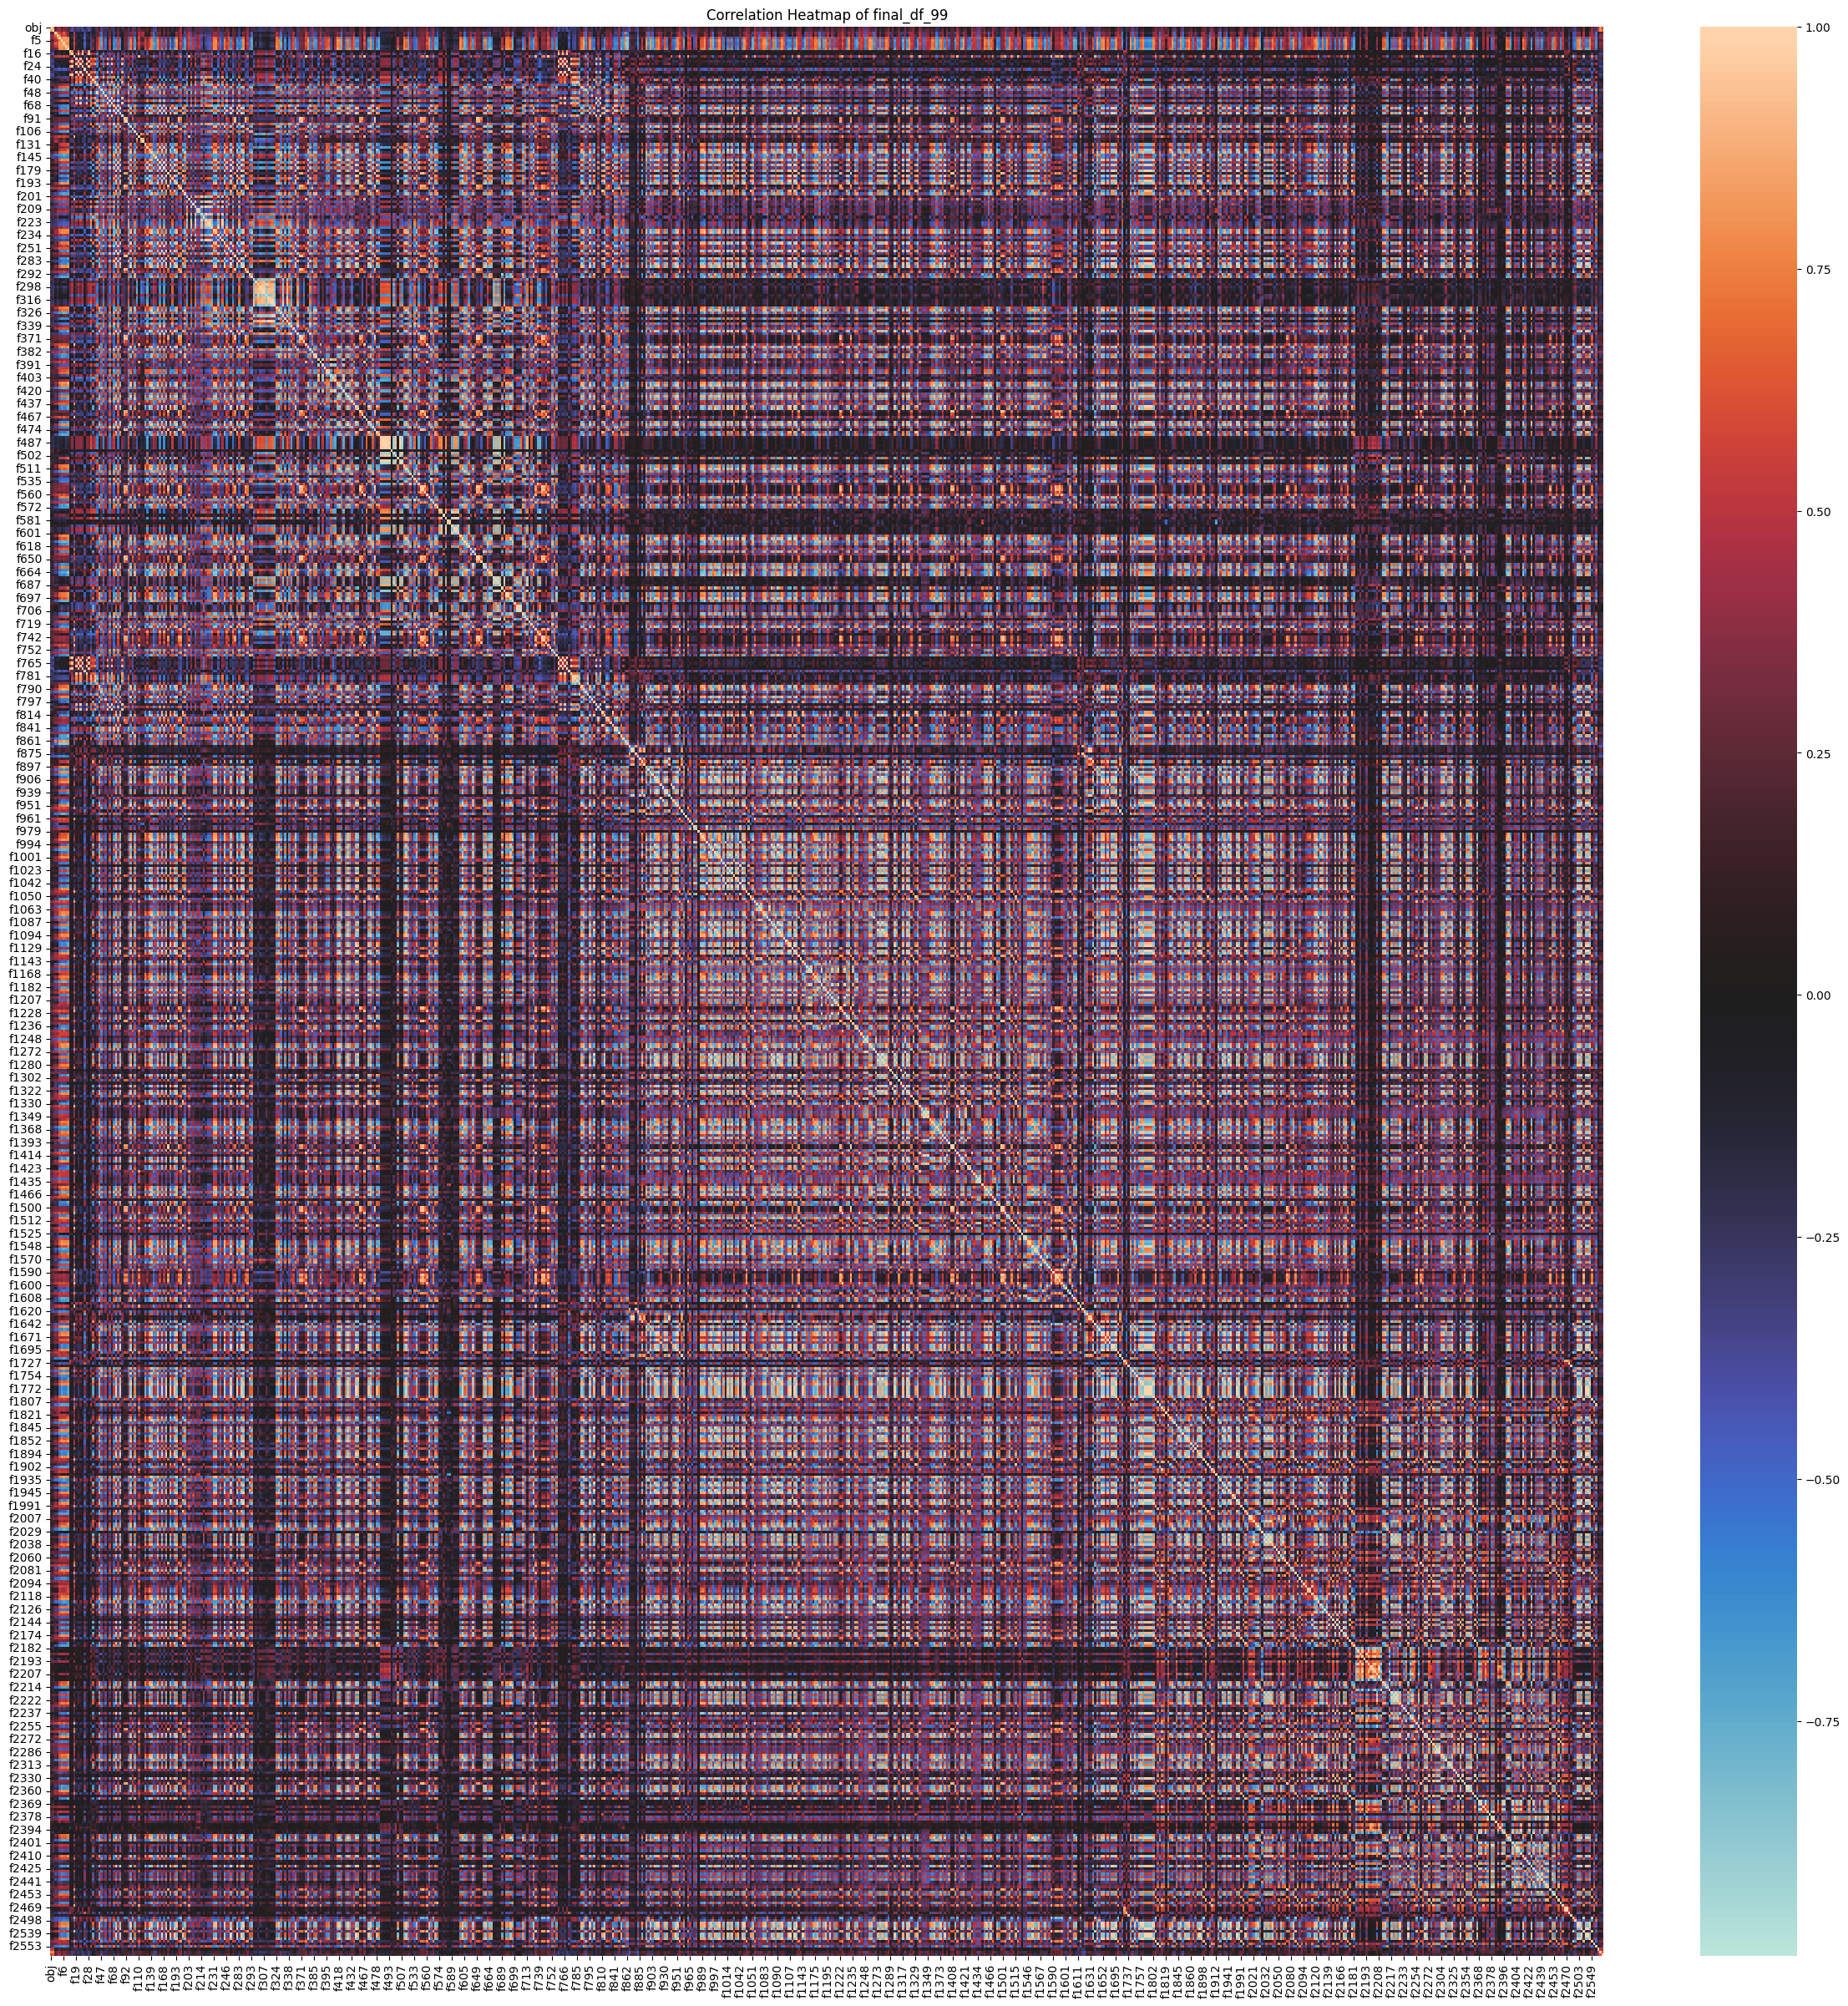

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = final_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(30, 30))

sns.heatmap(correlation_matrix, center=0)

plt.title(f'Correlation Heatmap of final_df_{int(threshold*100)}')

plt.show()


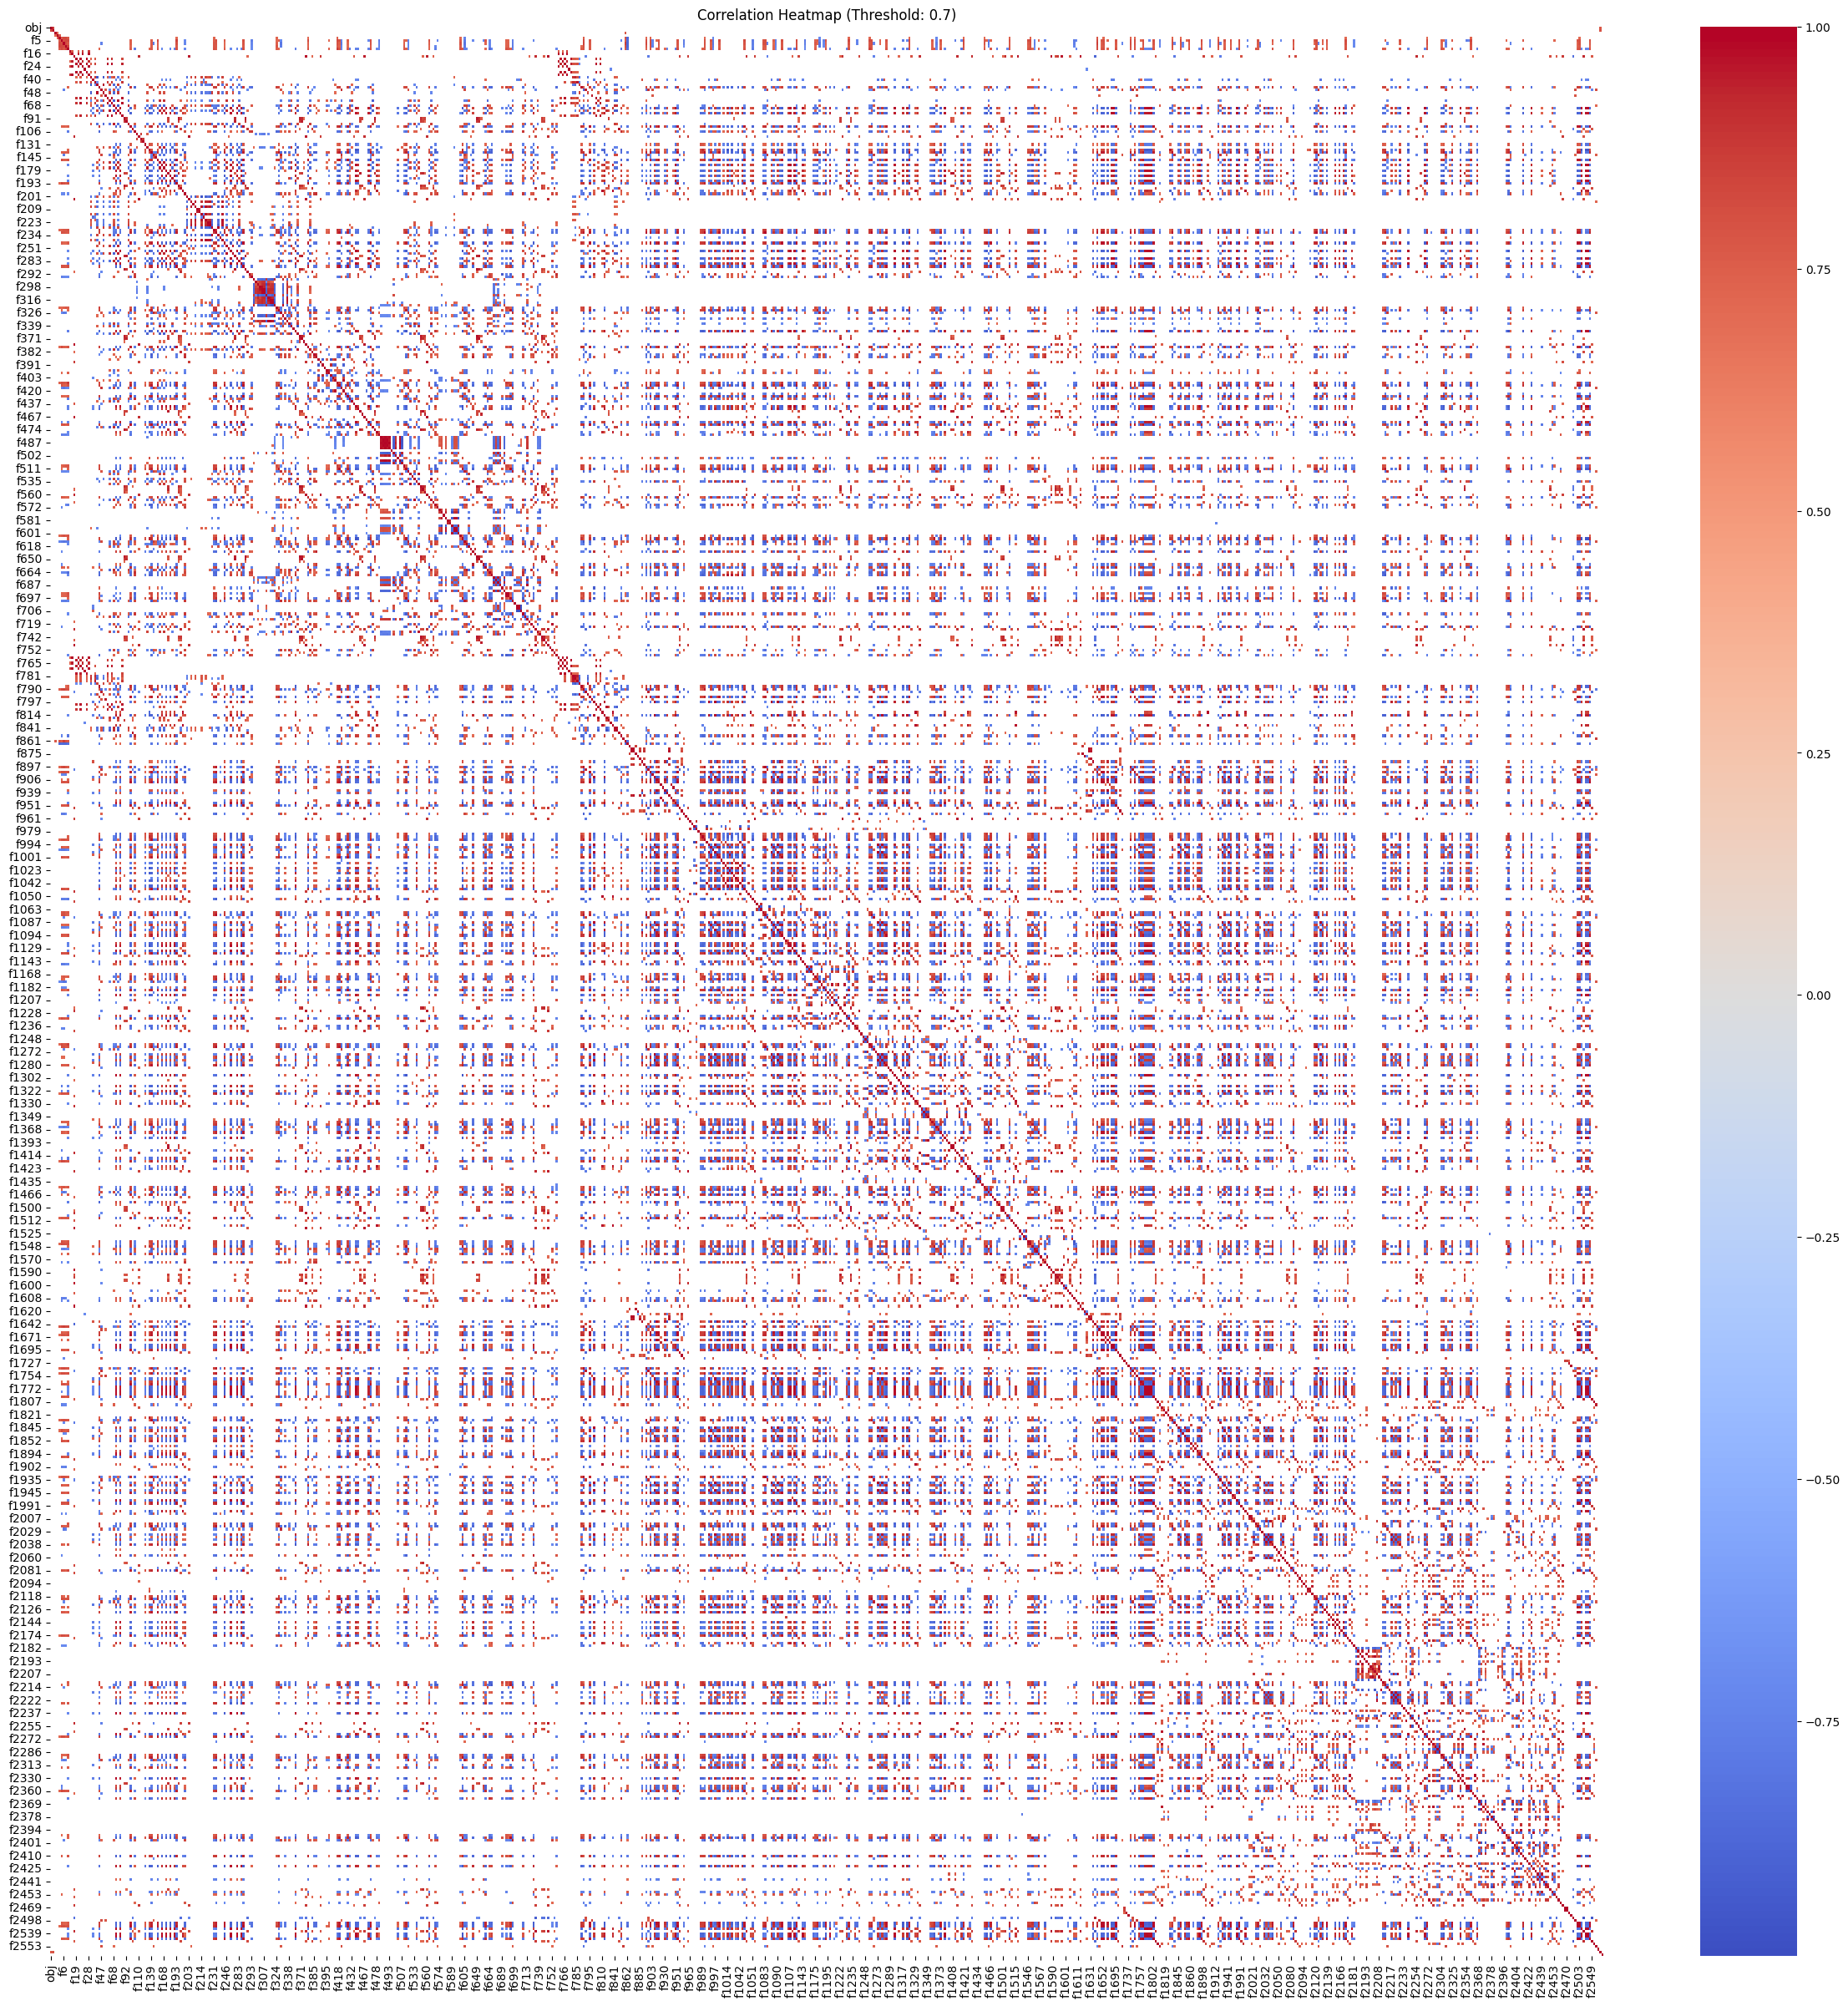

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_df is your dataframe
# If your dataframe contains non-numeric columns, you might want to select only numeric columns for correlation
numeric_columns = final_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set a correlation threshold
correlation_threshold = 0.7
correlation_matrix_filtered = correlation_matrix[correlation_matrix.abs() > correlation_threshold]

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(30, 30))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix_filtered, cmap='coolwarm', center=0)

# Add a title
plt.title(f'Correlation Heatmap (Threshold: {correlation_threshold})')

# Show the plot
plt.show()


<Figure size 30000x30000 with 0 Axes>

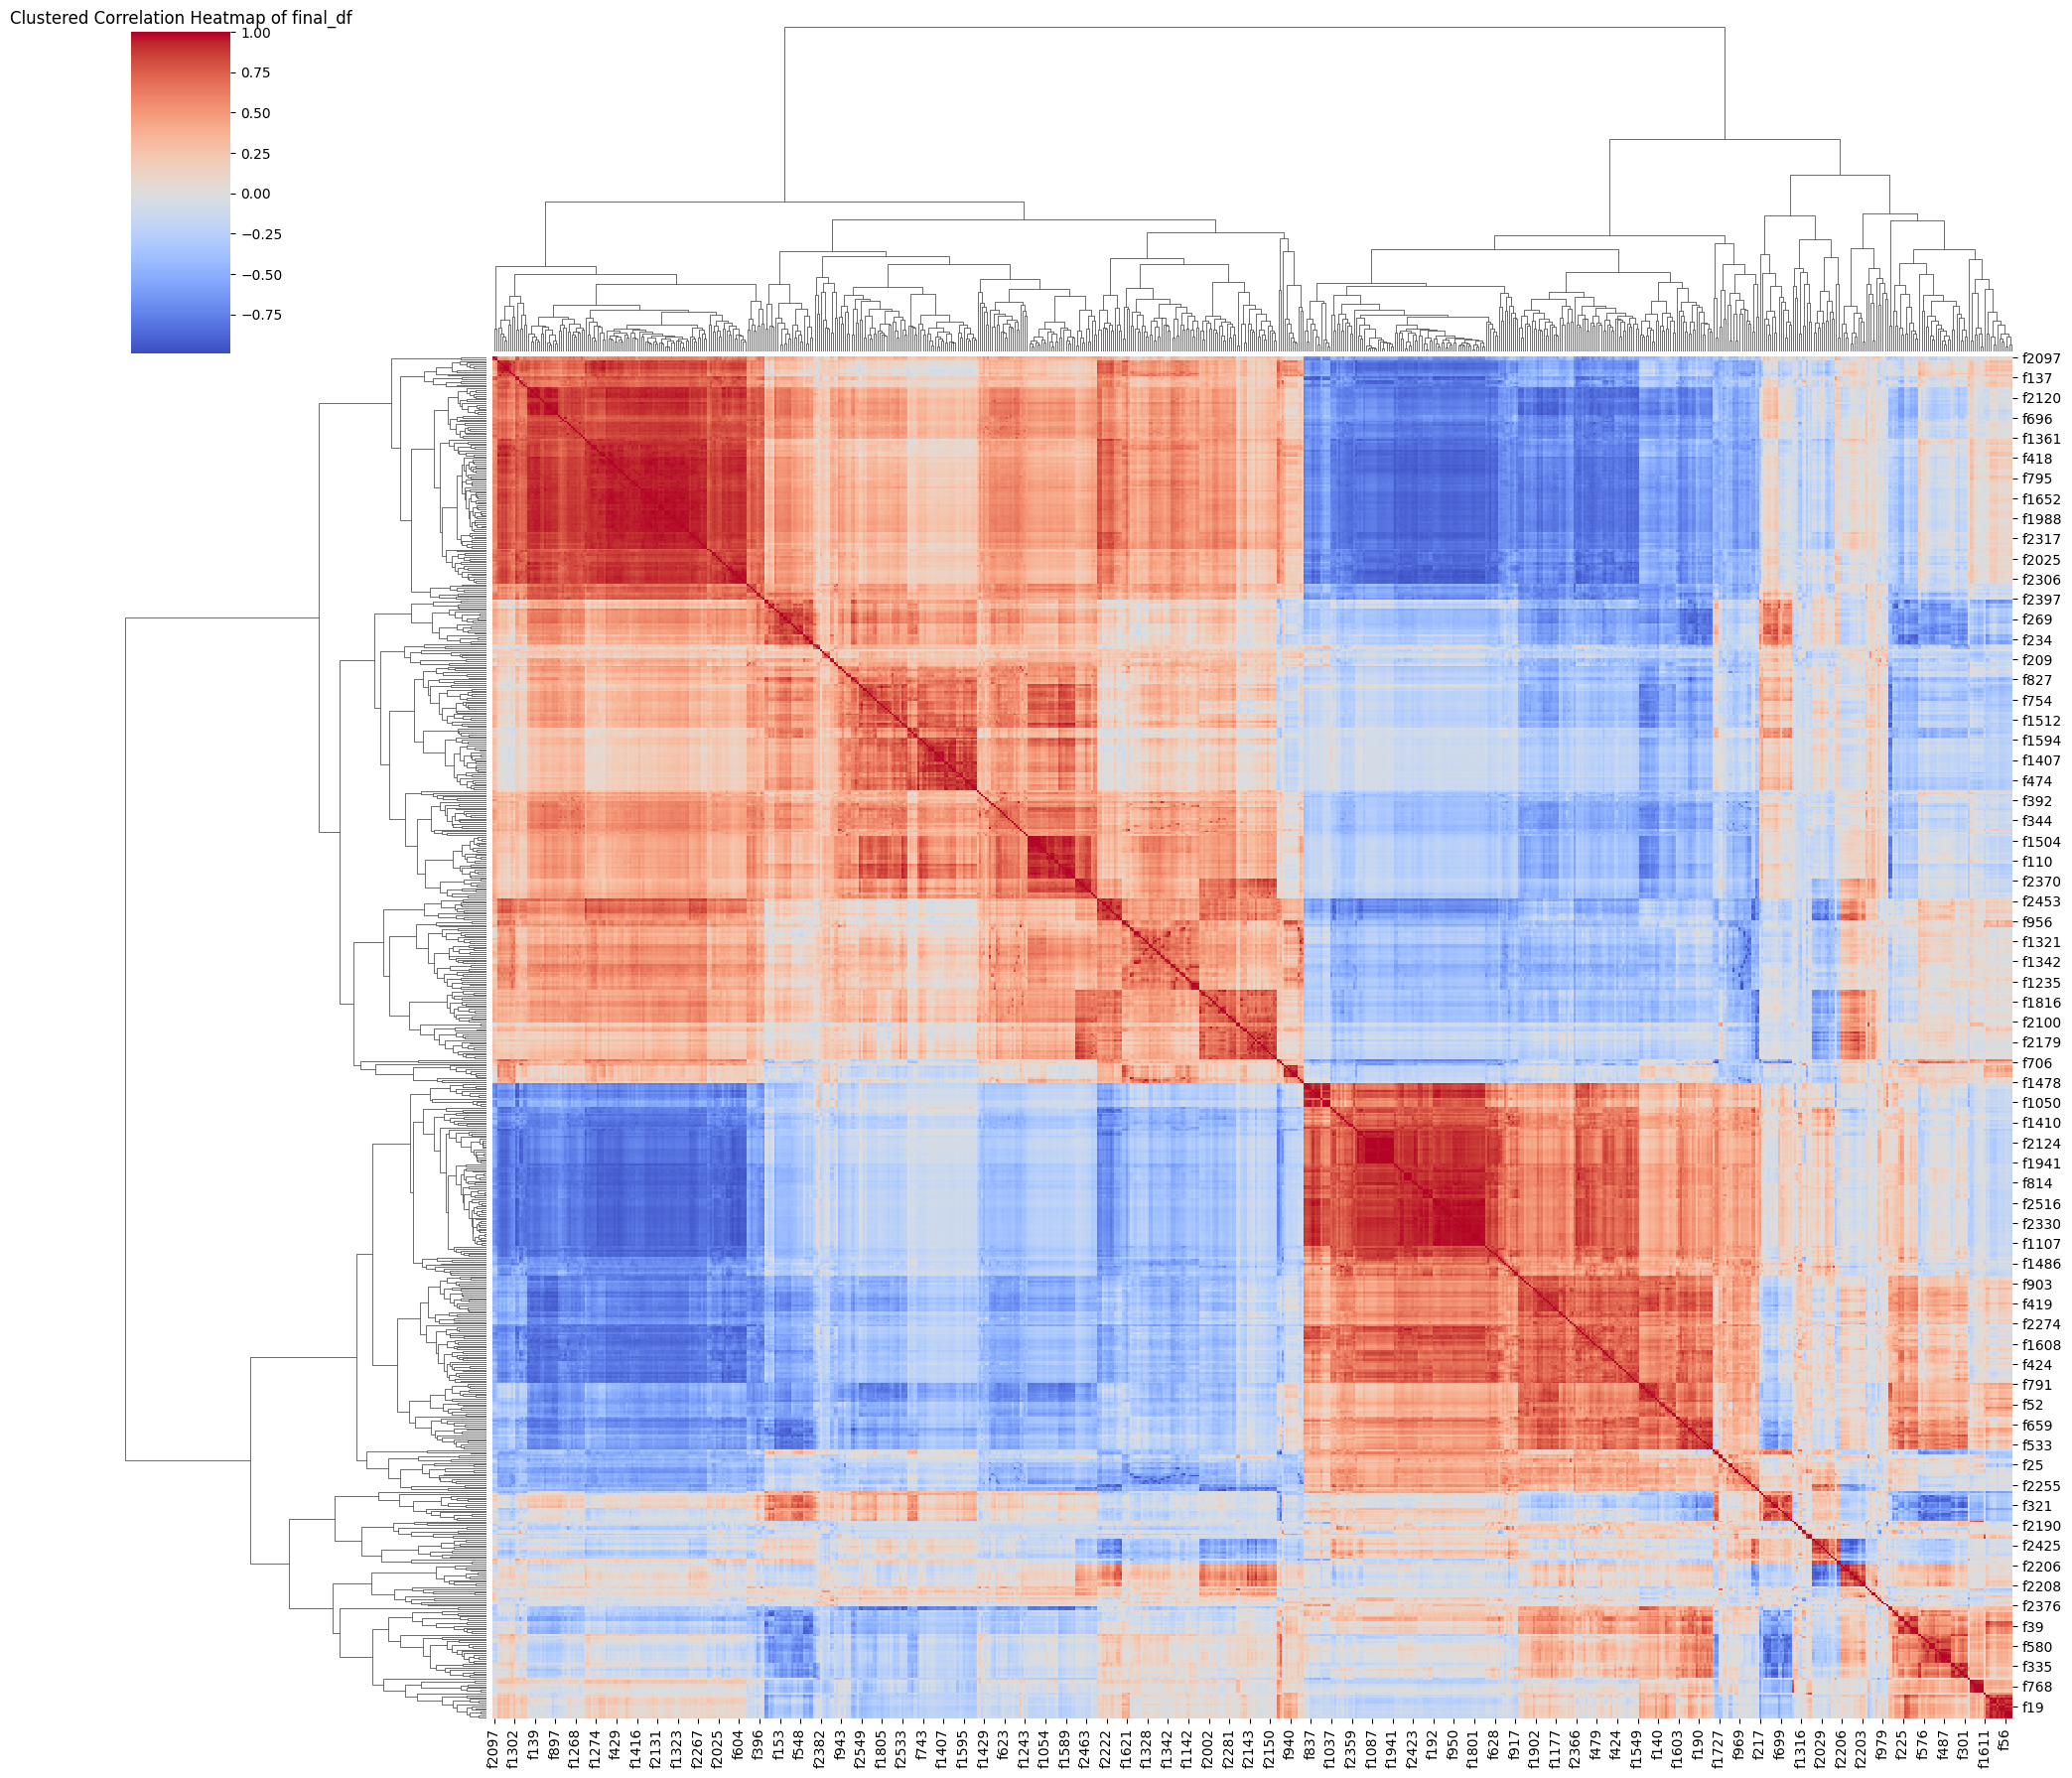

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Assuming final_df is your dataframe
# If your dataframe contains non-numeric columns, you might want to select only numeric columns for correlation
numeric_columns = final_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Calculate linkage matrix for hierarchical clustering
linkage = hierarchy.linkage(correlation_matrix, method='average')

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(300, 300))

# Create a clustered heatmap using seaborn
sns.clustermap(correlation_matrix, method='average', cmap='coolwarm', center=0, figsize=(20, 18), row_linkage=linkage, col_linkage=linkage)

# Add a title
plt.title('Clustered Correlation Heatmap of final_df')

# Show the plot
plt.show()


#  Clustered Heatmap
 یک نوع نمودار است که با استفاده از رنگ‌ها و خوشه‌بندی، ارتباطات میان متغیرها را نمایش می‌دهد. در این نمودار، داده‌های ماتریسی از همبستگی (مانند ماتریس کورلیشن) یا سایر اطلاعات مشابه، با استفاده از رنگ‌ها نمایش داده می‌شوند و سعی می‌شود تا مشاهده‌هایی دربارهٔ الگوهای همبستگی و تفاوت‌ها در داده‌ها ارائه شود.



#  Clustered Heatmap
 به این دلیل که از همبستگی‌ها برای خوشه‌بندی و ترتیب داده‌ها استفاده می‌کند، به نام "خوشه‌بندی شده" می‌آید. ایده اصلی این نمودار این است که متغیرهایی که همبستگی بالاتری با یکدیگر دارند، در یک خوشه قرار گیرند. این امر به شما کمک می‌کند الگوها و ساختارهایی که در داده‌ها وجود دارند را تشخیص دهید.



# با داشتن تعداد زیادی متغیر، نمودار  هیت مپ کلاستر شده می‌تواند به شما کمک کند تا درک بهتری از روابط میان متغیرها پیدا کنید، اما با توجه به تعداد زیادی متغیر، خوانایی نمودار ممکن است کاهش یابد و نیاز به تحلیل دقیق‌تر داشته باشید.




